In [19]:
import pandas as pd
from pycaret.classification import *

In [20]:
# charger les données d'entraînement
df_train = pd.read_csv('emotions_train.csv')

#charger les données de test
test_data = pd.read_csv('emotions_test.csv')

#affichage des premières lignes de chaque dataset
print("Train:")
print(df_train.head())

print("")
print("######################################################################")
print("######## * ML IN THE CLOUDS * ######### * ML IN THE CLOUDS * #########")
print("######################################################################")
print("Test:")
print("")


print(test_data.head())


Train:
                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

######################################################################
######## * ML IN THE CLOUDS * ######### * ML IN THE CLOUDS * #########
######################################################################
Test:

     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhh

In [21]:
# Recherche de valeurs manquantes
df_train.isna().sum()

Text       0
Emotion    0
dtype: int64

In [22]:
duplicata = df_train.Text.duplicated()

- Il y a des données dupliquées. 

In [23]:
len(df_train[duplicata])

54

- Il y a peu de données dupliquées soit 0.02% , donc nous allons les supprimer.

In [24]:
df_train_unique = df_train.drop_duplicates(subset='Text')
# Nombre de caractère present dans chaque phrase
nb_caracteres = df_train_unique['Text'].str.len()
nb_caracteres

0         23
1        108
2         48
3         92
4         20
        ... 
21454     36
21455     91
21456     36
21457     50
21458     31
Name: Text, Length: 21405, dtype: int64

<Axes: >

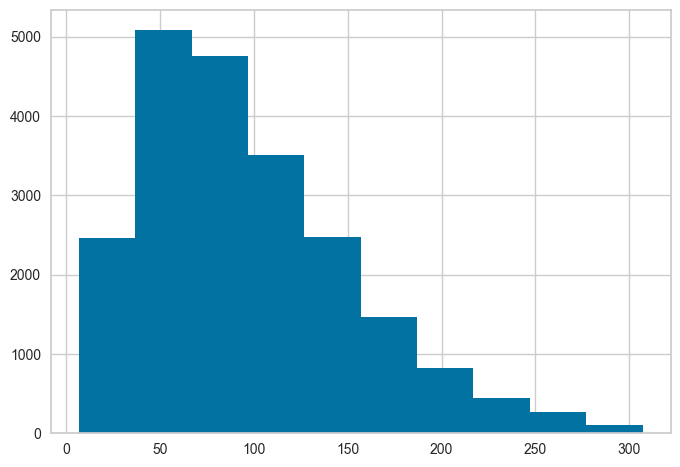

In [25]:
nb_caracteres .hist()

In [26]:
# Recherche du nombre de mots présents dans les phrases
nb_de_mots = df_train_unique['Text'].str.split().map(lambda x: len(x))
nb_de_mots

0         4
1        21
2        10
3        18
4         4
         ..
21454     7
21455    13
21456     6
21457     8
21458     7
Name: Text, Length: 21405, dtype: int64

<Axes: >

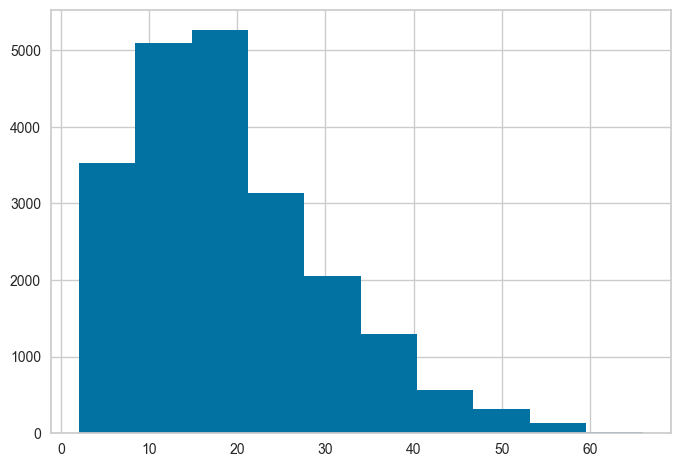

In [27]:
nb_de_mots.hist()

In [28]:
# Moyenne des longueurs des mots
import numpy as np
moyenne_longueur_mots = df_train_unique['Text'].str.split().apply(lambda x : [len(i) for i in x]). map(lambda x: np.mean(x))
moyenne_longueur_mots

0        5.000000
1        4.190476
2        3.900000
3        4.166667
4        4.250000
           ...   
21454    4.285714
21455    6.076923
21456    5.166667
21457    5.375000
21458    3.571429
Name: Text, Length: 21405, dtype: float64

<Axes: >

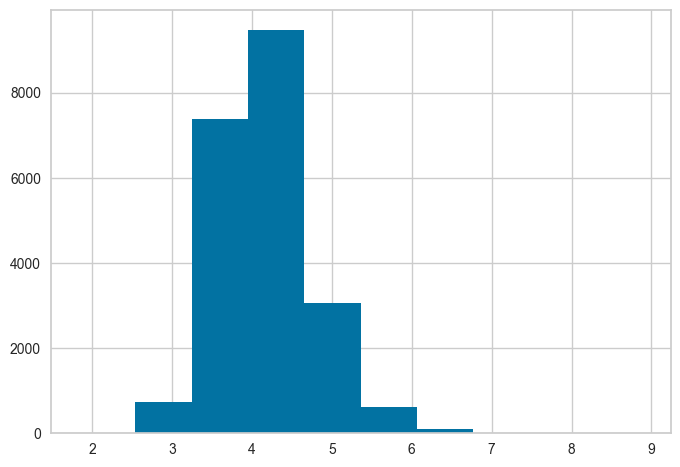

In [29]:
moyenne_longueur_mots.hist()

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df_train_unique['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size = 10).generate(text)

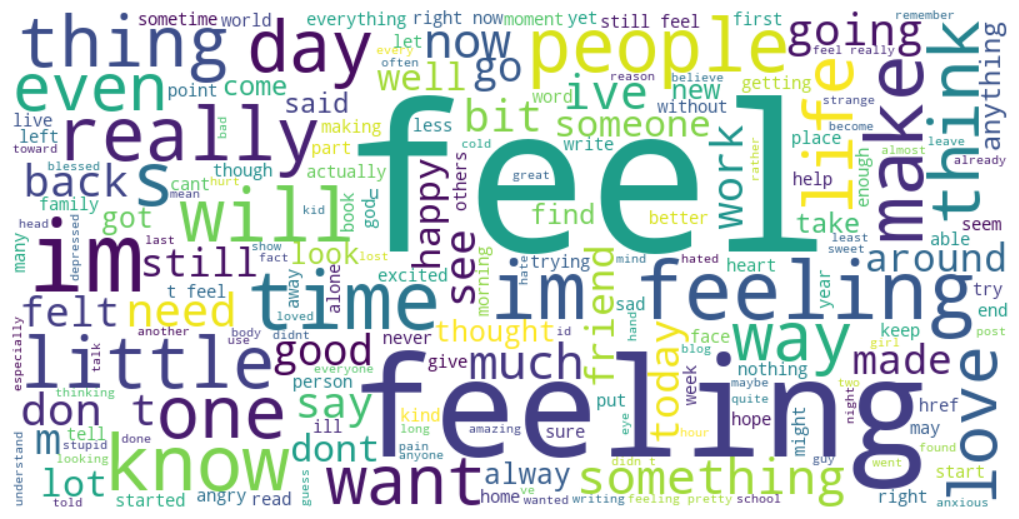

In [31]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()

In [32]:
df_train_unique.Emotion.unique()
import plotly.graph_objects as go

# Répartition du target

fig = go.Figure([go.Bar(x=df_train_unique['Emotion'].value_counts().index, y=df_train_unique['Emotion'].value_counts().tolist())])
fig.update_layout(
    title="Répartition des sentiments",
    xaxis_title="Emotions",
    yaxis_title="Valeurs")
fig.show()

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
df_train_unique.Text
df = df_train_unique.copy()
def text_processing(text):
     #Charger les stop-words en anglais
    stop_words = set(stopwords.words('english'))
   

    # Initialiser le lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Appliquer la tokenisation à tous les textes
    tokens = word_tokenize(text.lower())

    # Supprimer les ponctuations
    tokens = [word for word in tokens if word not in string.punctuation]
    

    # Supprimer les stop-words
    tokens = [word for word in tokens if word not in stop_words]
    

    # Appliquer la lemmatisation à tous les tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = ' '.join(tokens)
   

    return tokens
    
df['Text_processed'] = df['Text'].apply(text_processing)
df.head()

,Text,Emotion,Text_processed
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


In [36]:
# Environnement de classification Pycaret
clf = setup(data=df, 
            target='Emotion',  #colonne cible à prédire
            session_id=123, 
            html=False,
            log_experiment=True,
            experiment_name='Emotion_Classification',
            text_features=['Text_processed']
)

# Entraîner et comparer les modèles

# Comparer les modèles 
best_model = compare_models()

# Afficher les métriques du meilleur modèle
evaluate_model(best_model)

# Afficher les métriques de tous les modèles
models = pull()
print(models)


                       Description  \
0                       Session id   
1                           Target   
2                      Target type   
3                   Target mapping   
4              Original data shape   
5           Transformed data shape   
6      Transformed train set shape   
7       Transformed test set shape   
8                    Text features   
9             Categorical features   
10                      Preprocess   
11                 Imputation type   
12              Numeric imputation   
13          Categorical imputation   
14  Text features embedding method   
15        Maximum one-hot encoding   
16                 Encoding method   
17                  Fold Generator   
18                     Fold Number   
19                        CPU Jobs   
20                         Use GPU   
21                  Log Experiment   
22                 Experiment Name   
23                             USI   

                                                V

In [ ]:

test_data.drop(columns =['tweet_id', 'author'], axis = 1, inplace = True)  
test_data.columns = test_data.columns.str.replace('sentiment', 'Emotion')
test_data.columns = test_data.columns.str.replace('content', 'Text')
test_data_unique = test_data.drop_duplicates(subset='Text')

test_data_unique['Text_processed'] = test_data_unique['Text'].apply(text_processing)

# Finaliser le modèle
final_model = finalize_model(best_model)

# Faire des prédictions sur les nouvelles données
predictions = predict_model(final_model, data=test_data_unique)

# Afficher les prédictions
print(predictions)
